# List of Analysis Objectives

### 1. Descriptive Statistics - Correlations, Max/Min Values, Ranking Metric
### 2. Inferential Statistics - Distribution testing, Hypothesis testing, Best-fit Modeling

---

# Descriptive Stats

### Importing the data

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("IMDB-Movie-Data.csv")
print(df.shape)
df.head()


(1000, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Which movie have the longest and shortest runtime?

Longest Movie

Rank                                                                829
Title                                                        Grindhouse
Genre                                            Action,Horror,Thriller
Description           Quentin Tarantino and Robert Rodriguez's homag...
Director                                               Robert Rodriguez
Actors                Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell
Year                                                               2007
Runtime (Minutes)                                                   191
Rating                                                              7.6
Votes                                                            160350
Revenue (Millions)                                                25.03
Metascore                                                           NaN
Name: 828, dtype: object

Shortest Movie

Rank                                                                794
Title  

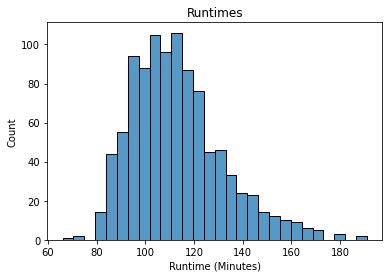

In [2]:
sns.histplot(df['Runtime (Minutes)']).set(title='Runtimes')
print("Longest Movie",df.loc[df['Runtime (Minutes)'].idxmax()],"Shortest Movie",
      df.loc[df['Runtime (Minutes)'].idxmin()],sep="\n\n")

### What movies are the highest and lowest grossing?

Highest Grossing

Rank                                                                 51
Title                        Star Wars: Episode VII - The Force Awakens
Genre                                          Action,Adventure,Fantasy
Description           Three decades after the defeat of the Galactic...
Director                                                    J.J. Abrams
Actors                Daisy Ridley, John Boyega, Oscar Isaac, Domhna...
Year                                                               2015
Runtime (Minutes)                                                   136
Rating                                                              8.1
Votes                                                            661608
Revenue (Millions)                                               936.63
Metascore                                                          81.0
Name: 50, dtype: object

Lowest Grossing

Rank                                                                232
Titl

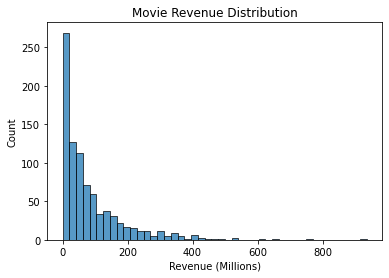

In [3]:
sns.histplot(df['Revenue (Millions)']).set(title='Movie Revenue Distribution')
print("Highest Grossing",df.loc[df['Revenue (Millions)'].idxmax()],"Lowest Grossing",
df.loc[df['Revenue (Millions)'].idxmin()],sep="\n\n")

## Cleaning the data

In [4]:
# Check for any duplicated movies
print(df.duplicated().sum())

# What values are missing and how many?
df.isnull().sum()

0


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

### METHOD 1: Drop the rows with missing data

In [5]:
df_drop = df.dropna(how = 'any')
df_drop.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

### METHOD 2: Replace values in the rows with missing data

In [6]:
df_replace = df
df_replace['Metascore'] = df_replace['Metascore'].fillna((df_replace['Metascore'].mean()))
df_replace['Revenue (Millions)'] = df_replace['Revenue (Millions)'].fillna((df_replace['Revenue (Millions)'].mean()))
print(df_replace.isna().sum())


Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


## Removing outliers from the 'Votes' cast

### METHOD 1: Using Z-score

In [7]:
import numpy as np
from scipy import stats

# Using the df with dropped data
df_drop_z = df_drop[(np.abs(stats.zscore(df_drop.Votes)) < 3)]

# Using the df with replaced data
df_rep_z = df_replace[(np.abs(stats.zscore(df_replace.Votes)) < 3)]

print(df_drop_z.shape,
df_rep_z.shape)


(826, 12) (985, 12)


### METHOD 2: Using Quantiles

In [8]:
# Using the df with dropped data
q_low = df_drop["Votes"].quantile(0.01)
q_hi  = df_drop["Votes"].quantile(0.99)

# filtering outliers
df_drop_fil = df_drop[(df_drop["Votes"] < q_hi) & (df_drop["Votes"] > q_low)]



# Using the df with replaced data
q_low = df_replace["Votes"].quantile(0.01)
q_hi  = df_replace["Votes"].quantile(0.99)

# filtering outliers
df_rep_fil = df_replace[(df_replace["Votes"] < q_hi) & (df_replace["Votes"] > q_low)]


# Compare the results
print(df_drop_fil.shape,
      df_rep_fil.shape)


(820, 12) (980, 12)


<p style="text-align: center;"> Renaming the 4 resulting dataframes statistics</p>

|  | Missing Data  | Outliers |
| ----------- | ----------- | ----------- |
| DF1 | Drop | Z-score |
| DF2 | Replace | Z-score |
| DF3 | Drop | Quantiles |
| DF4 | Replace | Quantiles |

In [9]:
DF1 = df_drop_z
DF2 = df_rep_z
DF3 = df_drop_fil
DF4 = df_rep_fil

When comparing the resulting dataframes from each cleaning method, there is only two significant difference - the ranking of movies is different 

In [22]:
DF1a = DF1[['Rank', 'Title']]
print(DF1a.head(n=19),'\n')

DF2a = DF2[['Rank', 'Title']]
print(DF2a.head(n=19),'\n')

DF3a = DF3[['Rank', 'Title']]
print(DF3a.head(n=19),'\n')

DF4a = DF4[['Rank', 'Title']]
print(DF4a.head(n=19))

    Rank                                    Title
0      1                  Guardians of the Galaxy
1      2                               Prometheus
2      3                                    Split
3      4                                     Sing
4      5                            Suicide Squad
5      6                           The Great Wall
6      7                               La La Land
8      9                       The Lost City of Z
9     10                               Passengers
10    11  Fantastic Beasts and Where to Find Them
11    12                           Hidden Figures
12    13                                Rogue One
13    14                                    Moana
14    15                                 Colossal
15    16                  The Secret Life of Pets
16    17                            Hacksaw Ridge
17    18                             Jason Bourne
18    19                                     Lion
19    20                                  Arrival 

And second - the number of 'Votes', however this diffence does not affect the 'Rating' nor the 'Metascore'

In [ ]:
print(DF1["Votes"].describe(),
DF2["Votes"].describe(),
DF3["Votes"].describe(),
DF4["Votes"].describe())

In [ ]:
print(DF1["Rating"].describe(),
DF2["Rating"].describe(),
DF3["Rating"].describe(),
DF4["Rating"].describe())

In [ ]:
print(DF1["Metascore"].describe(),
DF2["Metascore"].describe(),
DF3["Metascore"].describe(),
DF4["Metascore"].describe())

## For the remainder of this analysis I will choose one of the four dataframes 
*I chose DF1 (dropped missing values and Z-score for outliers)*
____

### Let's take a look the correlation matrix

<AxesSubplot:>

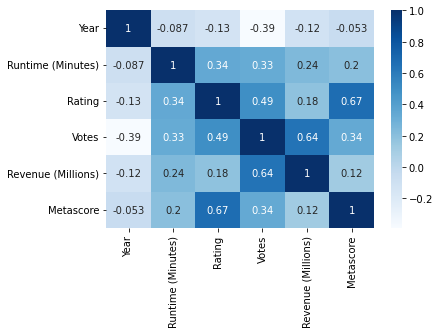

In [37]:
corr = DF1.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

Most of these correlation coefficients make sense. High-grossing movies have more votes cast and more votes cast lead to ratings closer to the average. Also movies that recieve a certain metascore, recieve a similar rating

What are more interesting are the following correlations:

### The correlation between year and votes

In [38]:
DF1['Year'].corr(DF1['Votes'])

-0.38721257108101337

Maybe it's the case that less people are actively voting on IMDB as time goes on

### The correlation between runtime and rating/votes

In [39]:
print(DF1["Runtime (Minutes)"].corr(DF1["Rating"]),
      DF1["Runtime (Minutes)"].corr(DF1["Votes"]),sep="\n")

0.3392752303169184
0.3259673333000194


Could be just a coincidence, but longer movies appear to recieve more votes and higher ratings

### Not as statistically significant, but also runtime and revenue

In [41]:
DF1["Runtime (Minutes)"].corr(DF1["Revenue (Millions)"])    

0.24069104256470747

Most likely just a coincidence, but this would suggest longer movies earn more money on average.

## Create a new ranking metric based on the cleaned data

There are 3 relevant data points when thinking about the rank of a movie:
1. The IMDB Rating (Based on Votes)
2. Number of Votes
3. The metascore - which is a weighted average of top critic reviews from around the internet

Let's come up with a Total Average Score based on 'Rating' and 'Metascore', but lets not include the 'Rating' if there are less than 100 votes (ie. base it just on the metascore)

In [42]:
# Check to see if any votes are less than 100
limit = 100
column = DF1["Votes"]
print(column[column < limit].count())

0


In [43]:
# Divide the metascore by 10, so both 'rating' and 'metascore' are out of 10
DF1["Metascore"] = DF1["Metascore"]/10
DF1["Total Average Score"] = (DF1["Metascore"] + DF1["Rating"])/2
# Round any long float values to 3 decimal places
decimals = 3    
DF1["Total Average Score"] = DF1["Total Average Score"].apply(lambda x: round(x, decimals))
DF1.head()

/var/folders/4t/8pcqqqsd2g3ch1b3_4zqdjxc0000gn/T/ipykernel_48648/576792617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1["Metascore"] = DF1["Metascore"]/10
/var/folders/4t/8pcqqqsd2g3ch1b3_4zqdjxc0000gn/T/ipykernel_48648/576792617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1["Total Average Score"] = (DF1["Metascore"] + DF1["Rating"])/2
/var/folders/4t/8pcqqqsd2g3ch1b3_4zqdjxc0000gn/T/ipykernel_48648/576792617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Total Average Score
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,7.6,7.85
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,6.5,6.75
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,6.2,6.75
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,5.9,6.55
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,4.0,5.10


In [44]:
# Ranking based on new score
DF1['Rank'] = DF1['Total Average Score'].rank(ascending = False, method='dense')
  
# Set the index to newly created column, Total Average Score
DF1 = DF1.set_index('Rank')
DF1_new = DF1.sort_index()
DF1_new


/var/folders/4t/8pcqqqsd2g3ch1b3_4zqdjxc0000gn/T/ipykernel_48648/912156806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Rank'] = DF1['Total Average Score'].rank(ascending = False, method='dense')


,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Total Average Score
Rank,,,,,,,,,,,,
1.0,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,9.8,9.00
2.0,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,10.0,8.95
3.0,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,9.6,8.85
4.0,Ratatouille,"Animation,Comedy,Family",A rat who can cook makes an unusual alliance w...,Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.0,504039,206.44,9.6,8.80
4.0,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,9.3,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...
107.0,Sex and the City 2,"Comedy,Drama,Romance","While wrestling with the pressures of life, lo...",Michael Patrick King,"Sarah Jessica Parker, Kim Cattrall, Kristin Da...",2010,146,4.3,62403,95.33,2.7,3.50
108.0,Max Steel,"Action,Adventure,Family",The adventures of teenager Max McGrath and his...,Stewart Hendler,"Ben Winchell, Josh Brener, Maria Bello, Andy G...",2016,92,4.6,11555,3.77,2.2,3.40
109.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,1.1,3.20


In [45]:
# Output results to a CSV file
DF1_new.to_csv("out.csv")

----

# Inferential Statistics

### Let's take a look at the distrubtion of the 'Total Average Score's

count    826.000000
mean       6.363257
std        1.180615
min        1.700000
25%        5.500000
50%        6.400000
75%        7.300000
max        9.000000
Name: Total Average Score, dtype: float64


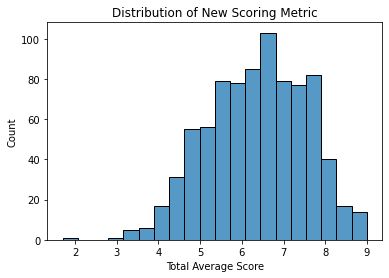

In [46]:
sns.histplot(DF1_new['Total Average Score']).set(title='Distribution of New Scoring Metric')
print(DF1_new["Total Average Score"].describe())

## Based on the plot above, it could be represented by a Normal Distribution. Let's run a test!
### H<sub>0</sub>: The data approximates a Normal Distribtion

### H<sub>1</sub>: The data approximates another type of distribution

In [47]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import normaltest

In [48]:
# Set up a helper function for checking p-values against an alpha level, and printing result
def hypothesis_test(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

In [49]:
# Create a dataset of normally distributed data
d1 = DF1_new["Total Average Score"]

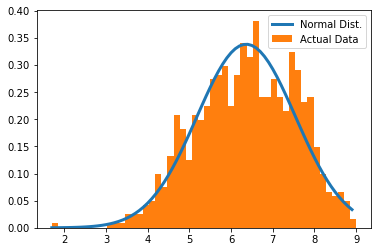

In [50]:
# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d1, 50, density=True, label='Actual Data');
plt.legend();

In [51]:
# Run normal test on the data
stat, p_val = normaltest(d1)

In [52]:
# Check the p-value of the normaltest
print('\nNormaltest p-value is: '+ str(p_val))

# With alpha value of 0.05, how should we proceed
hypothesis_test(p_val, alpha=0.05)


Normaltest p-value is: 0.0006317385390053456
We have evidence to reject the null hypothesis.


### Lets see if we can find a better approximation other than a Normal Distribution

In [53]:
from distfit import distfit

# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(d1)

# Print summary of evaluated distributions
dist.summary



[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.02 sec] [RSS: 0.0774417] [loc=6.363 scale=1.180]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.22618] [loc=1.700 scale=4.663]
[distfit] >[pareto    ] [0.15 sec] [RSS: 1.14301] [loc=-18032254.655 scale=18032256.355]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.122156] [loc=6.377 scale=1.057]
[distfit] >[t         ] [0.12 sec] [RSS: 0.0774351] [loc=6.363 scale=1.180]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.0600729] [loc=6.000 scale=1.228]
[distfit] >[gamma     ] [0.12 sec] [RSS: 0.0794917] [loc=-17.875 scale=0.059]
[distfit] >[lognorm   ] [0.25 sec] [RSS: 0.0787679] [loc=-164.757 scale=171.119]
[distfit] >[beta      ] [0.08 sec] [RSS: 0.0587028] [loc=0.649 scale=8.882]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.70152] [loc=1.700 scale=7.300]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 0.0752152] [loc=-3.071 scale=3.929]
[distfit] >Compute confidence interval [parametric]


,distr,score,LLE,loc,scale,arg
0,beta,0.058703,NaN,0.648975,8.881696,"(7.6795296452503194, 4.2523963551146755)"
1,genextreme,0.060073,NaN,6.000265,1.228009,"(0.37768526529565233,)"
2,loggamma,0.075215,NaN,-3.070808,3.92866,"(11.534230534243287,)"
3,t,0.077435,NaN,6.363247,1.179936,"(4940837.891480394,)"
4,norm,0.077442,NaN,6.363257,1.1799,()
5,lognorm,0.078768,NaN,-164.756731,171.118684,"(0.006872460552919849,)"
6,gamma,0.079492,NaN,-17.87457,0.058933,"(411.158223879361,)"
7,dweibull,0.122156,NaN,6.377413,1.05722,"(1.3760963608443042,)"
8,uniform,0.70152,NaN,1.7,7.3,()
9,pareto,1.14301,NaN,-18032254.654758,18032256.354758,"(3384715.187047409,)"


### Looks like a Beta Distribution is the best approximation, with a Residual Sum of Squares (RSS) of ~0.0587

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: beta'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

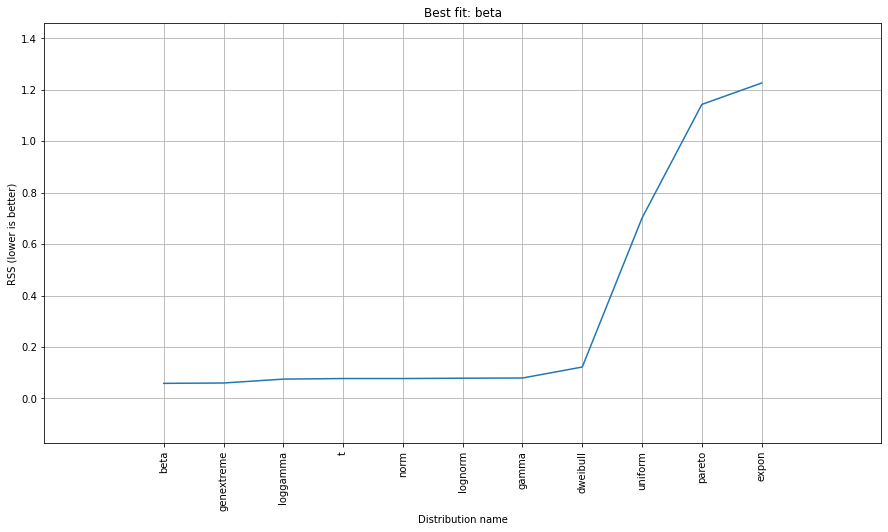

In [54]:
dist.plot_summary()

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\nRSS(a=7.67953, b=4.2524, loc=0.648975, scale=8.8817)'}, xlabel='Values', ylabel='Frequency'>)

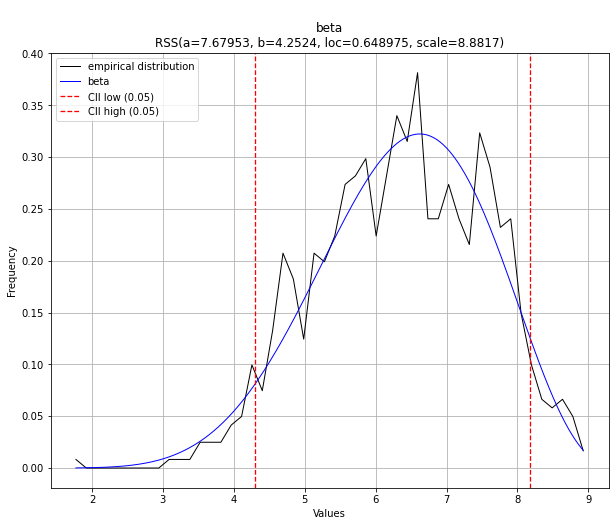

In [55]:
# Plot results
dist.plot()

### Based on this our 95% confidence interval, CI = [4.2524, 7.67953]
Meaning that there is 95% chance that populaiton parameter of "Total Average Score"s will fall between this range. 

# Conclusions
This analysis brings a couple of interesting insights:

1. Less people are voting on the IMDB platform over the years, likely due to loss of users to other platforms like Rotten Tomatoes and LetterBoxd.

2. Longer movies tend to be rated higher - this agrees with the trend of popular movies today (2023), as it is difficult to find a popular movie under 2 hours long.

3. The distribution of 'Total Average Score's first looked like it approximated a Normal distribution, but after testing the Beta distribution is a better fit.

